In [ ]:
# Analysis of Longitudinal Data Using Julia 

Demo code presentation for teaching the lecture of longitudinal and mixed effects models (CPH684) at the department of epidemiology and biostatistics, University of Arizona. Lectures follow the book [**Applied Longitudinal Analysis, Fitzmaurice, Laird, and Ware**](http://www.wiley.com/WileyCDA/WileyTitle/productCd-0470380276.html).  Datasets can be found in their [website](https://www.hsph.harvard.edu/fitzmaur/ala/).

In [1]:
cd("/Users/jzhou/GoogleDriveNoSpace/Teaching/CPH684/JinZhou-Fall16/")
pwd()

"/Users/jzhou/Google Drive/Teaching/CPH684/JinZhou-Fall16"

Machine information:

In [2]:
versioninfo()
#Pkg.update()

Julia Version 0.5.0
Commit 3c9d753 (2016-09-19 18:14 UTC)
Platform Info:
  System: Darwin (x86_64-apple-darwin13.4.0)
  CPU: Intel(R) Core(TM) i7-3840QM CPU @ 2.80GHz
  WORD_SIZE: 64
  BLAS: libopenblas (USE64BITINT DYNAMIC_ARCH NO_AFFINITY Sandybridge)
  LAPACK: libopenblas64_
  LIBM: libopenlibm
  LLVM: libLLVM-3.7.1 (ORCJIT, ivybridge)


INFO: Updating METADATA...
INFO: Updating FreqTables master...
INFO: Updating SnpArrays master...
INFO: Updating VarianceComponentModels master...
INFO: Computing changes...
INFO: No packages to install, update or remove


## Julia Intro

We will use [`DataFrames.jl`](https://github.com/JuliaStats/DataFrames.jl) package to perform data manipulation. 

In [3]:
#Pkg.add("DataFrames")
using DataFrames

In [4]:
mydata = readtable("./Lec3-IntroSAS-R/Example/sasintro.txt",separator = ' ',header=false)
cnames = ["weight", "bmi",  "id" , "age" , "activity",  "education",  "smoking"]
names!(mydata, [Symbol(cnames[i]) for i in 1:7])

,weight,bmi,id,age,activity,education,smoking
1,198,24.8,9790,59.8,7528.3,17,0
2,198,30.9,4587,59.8,1558.2,12,0
3,196,24.9,4844,61.6,858.2,19,0
4,196,27.5,616,63.0,2552.0,16,0
5,157,24.4,6511,77.8,1470.0,16,0
6,142,20.1,9972,62.6,1138.0,19,0
7,245,32.8,8911,68.7,2310.0,16,0
8,148,21.6,9173,72.2,3133.4,16,0
9,176,23.1,9783,68.2,2007.7,16,0
10,161,22.6,9843,74.3,1686.3,13,0


In [5]:
#smoking people
mydata[mydata[:smoking].==1,:]

,weight,bmi,id,age,activity,education,smoking
1,200,26.1,8642,76.0,3283.5,12,1
2,196,27.1,9950,74.7,1509.2,12,1
3,179,24.1,4717,61.6,227.4,16,1
4,194,31.1,1319,70.4,4410.2,16,1
5,200,29.1,9449,68.9,2367.0,18,1
6,190,25.4,9529,71.5,3069.0,14,1
7,172,24.9,7171,73.9,2613.3,16,1
8,229,29.0,4005,68.5,2914.5,12,1
9,188,27.6,6305,67.8,1226.0,12,1
10,135,21.6,5893,69.3,586.7,12,1


In [6]:
#drop column      
# (1)
mydata2 = mydata[~[(x in [:weight, :education]) for x in names(mydata)]]
# (2)
mydata2 = mydata[setdiff(names(mydata), [:weight, :education])]

,bmi,id,age,activity,smoking
1,24.8,9790,59.8,7528.3,0
2,30.9,4587,59.8,1558.2,0
3,24.9,4844,61.6,858.2,0
4,27.5,616,63.0,2552.0,0
5,24.4,6511,77.8,1470.0,0
6,20.1,9972,62.6,1138.0,0
7,32.8,8911,68.7,2310.0,0
8,21.6,9173,72.2,3133.4,0
9,23.1,9783,68.2,2007.7,0
10,22.6,9843,74.3,1686.3,0


In [7]:
#/*CREATING A NEW VARIABLE*/
#DATA mydata3;
#SET mydata;
#weight_kg=weight*0.453;
#IF age <=60 then agegroup=1;
#ELSE IF age <=70 and age >60 THEN agegroup=2;
#ELSE agegroup=3;
#RUN;
weight_kg = mydata[:weight]*0.453;
agegroup = ones(length(mydata[:age]));
agegroup[(mydata[:age] .<= 70) & (mydata[:age] .> 60)] = 2.;
agegroup[mydata[:age] .> 70] = 3;
agegroup

400-element Array{Float64,1}:
 1.0
 1.0
 2.0
 2.0
 3.0
 2.0
 2.0
 3.0
 2.0
 3.0
 2.0
 3.0
 2.0
 ⋮  
 1.0
 2.0
 3.0
 2.0
 1.0
 2.0
 1.0
 1.0
 3.0
 1.0
 2.0
 1.0

In [8]:
#PROC SORT DATA=mydata OUT=mydata4; 
#BY id age weight; 
#RUN;
mydata4 = sort(mydata,cols=[:id,:age,:weight]);

#PROC MEANS DATA=MYDATA;
#VAR WEIGHT;
#RUN;
mean(mydata[:weight])
#describe(mydata)
describe(mydata[agegroup.==1,:])
#/*weight in the youngest agegrp*/
#  PROC MEANS DATA=MYDATA3;
#VAR weight;
#WHERE agegroup=1;
#RUN;
#summary(mydata$weight[which(agegroup==1)])

weight
Min      146.0
1st Qu.  167.0
Median   181.0
Mean     178.67441860465115
3rd Qu.  189.0
Max      226.0
NAs      0
NA%      0.0%

bmi
Min      20.9
1st Qu.  24.15
Median   24.9
Mean     25.502325581395347
3rd Qu.  26.75
Max      31.6
NAs      0
NA%      0.0%

id
Min      126.0
1st Qu.  2838.5
Median   5566.0
Mean     5191.604651162791
3rd Qu.  7273.0
Max      9982.0
NAs      0
NA%      0.0%

age
Min      51.4
1st Qu.  55.9
Median   57.4
Mean     57.17674418604651
3rd Qu.  58.95
Max      60.0
NAs      0
NA%      0.0%

activity
Min      248.3
1st Qu.  1187.75
Median   2082.5
Mean     2601.6627906976746
3rd Qu.  3693.5
Max      7528.3
NAs      0
NA%      0.0%

education
Min      10.0
1st Qu.  12.0
Median   14.0
Mean     14.581395348837209
3rd Qu.  16.0
Max      19.0
NAs      0
NA%      0.0%

smoking
Min      0.0
1st Qu.  0.0
Median   0.0
Mean     0.13953488372093023
3rd Qu.  0.0
Max      1.0
NAs      0
NA%      0.0%



 [`Aggregate`](http://dataframesjl.readthedocs.io/en/latest/split_apply_combine.html?highlight=aggregate) function in dataframe is very useful. So as [split_apply_combine strategy](http://dataframesjl.readthedocs.io/en/latest/split_apply_combine.html)

In [9]:
#PROC MEANS DATA=mydata5;
#VAR weight;
#BY smoking;
#RUN;
aggregate(mydata[:,[:weight,:bmi,:age,:activity,:education,:smoking]], :smoking, mean)

,smoking,weight_mean,bmi_mean,age_mean,activity_mean,education_mean
1,0,176.33243967828417,25.74235924932976,67.66219839142089,2534.129222520107,14.509383378016086
2,1,188.03703703703704,26.703703703703702,65.38148148148149,2037.585185185185,14.0


In [10]:
mydatatmp = mydata[:,[:weight,:bmi,:age,:activity,:education]]
cor(Array(mydatatmp))

5×5 Array{Real,2}:
  1           0.809881   -0.0237191    -0.0577513     0.0476469
  0.809881    1           0.0557992    -0.109256      0.0135349
 -0.0237191   0.0557992   1            -0.000981908  -0.0596192
 -0.0577513  -0.109256   -0.000981908   1             0.124171 
  0.0476469   0.0135349  -0.0596192     0.124171      1        

## Regressions in Julia
[GLM.jl](https://github.com/JuliaStats/GLM.jl) 
Linear models (lm's) and generalized linear models (glm's) in Julia.

In [11]:
#Pkg.add("GLM")
using GLM;
#PROC ANOVA DATA=mydata;.
#CLASS smoking;
#MODEL bmi=smoking;
#RUN;
#summary(aov(bmi~smoking,data=mydata))
#summary(lm(bmi~smoking,data=mydata))
#fit <- glm(bmi~smoking,data=mydata)
# OLS = glm(bmi ~ smoking, mydata, Normal(), IdentityLink())
# stderr(OLS)
lm1 = fit(LinearModel, bmi ~ smoking, mydata)


INFO: Recompiling stale cache file /Users/jzhou/.julia/lib/v0.5/GLM.ji for module GLM.


DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredQR{Float64}},Array{Float64,2}}

Formula: bmi ~ 1 + smoking

Coefficients:
             Estimate Std.Error t value Pr(>|t|)
(Intercept)   25.7424  0.140129 183.705   <1e-99
smoking      0.961344  0.539357 1.78239   0.0754


In [12]:
#PROC REG DATA=mydata;
#MODEL bmi=age activity education smoking;
#RUN;
fit(LinearModel, bmi~age+smoking+activity+education,mydata)
fit(GeneralizedLinearModel, smoking~age+bmi+activity+education,mydata,Binomial())
glm(smoking~age+bmi+activity+education,mydata,Binomial(),LogitLink())

DataFrames.DataFrameRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Distributions.Binomial{Float64},GLM.LogitLink},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: smoking ~ 1 + age + bmi + activity + education

Coefficients:
                 Estimate   Std.Error   z value Pr(>|z|)
(Intercept)       0.10835     3.06077 0.0353996   0.9718
age            -0.0712766   0.0342259  -2.08254   0.0373
bmi              0.128741   0.0721358    1.7847   0.0743
activity     -0.000164278 0.000140251  -1.17131   0.2415
education      -0.0698051   0.0763711 -0.914025   0.3607


## Plots in Julia
Plots in Julia: http://julialang.org/downloads/plotting.html

Example plots were generated using package [PyPlot](http://matplotlib.org/api/pyplot_api.html).

[PyPlot](http://matplotlib.org/api/pyplot_api.html) uses the Julia PyCall package to call Python’s [matplotlib](http://matplotlib.org/api/pyplot_api.html) directly from Julia with little or no overhead (arrays are passed without making a copy). Make sure that Python and MatPlotlib are correctly installed. Some examples can be found [here](https://gist.github.com/gizmaa/7214002) and [here](http://csukuangfj.github.io/2015/07/PyPlot-in-julia/)

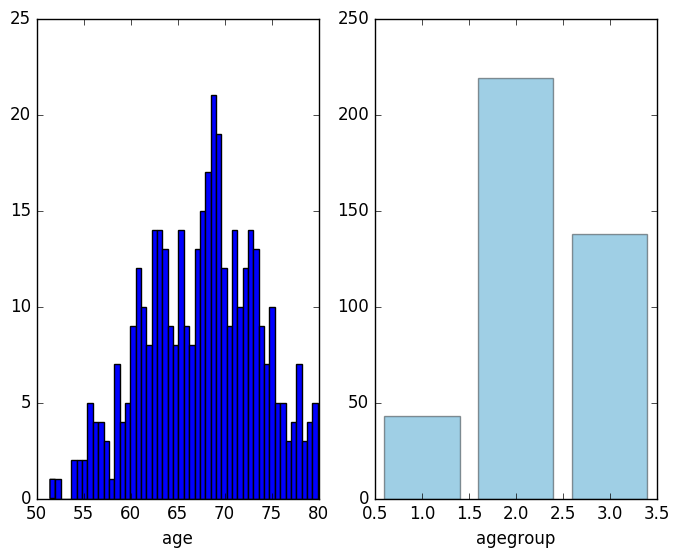

PyObject <matplotlib.text.Text object at 0x32e3f8198>

In [77]:
#*PLOTS;
#/*barcharts*/
#PROC CHART DATA=mydata3;
#VBAR agegroup/DISCRETE;
#RUN;
#Pkg.add("PyPlot")
#Pkg.add("Plots")
#Pkg.clone("https://github.com/nalimilan/FreqTables.jl.git")
using FreqTables
using Plots
using PyPlot
plt = PyPlot;
#h = PyPlot.plt.hist(x,nbins)
#hist(mydata[:age])
subplot(121)
h = plt.plt[:hist](mydata[:age],50) ;
plt.xlabel("age")
y = freqtable(agegroup)
names(y,1)
#barplot(table(agegroup))
subplot(122)
b = plt.bar(names(y,1),freqtable(agegroup),color="#0f87bf",align="center",alpha=0.4);
plt.xlabel("agegroup")

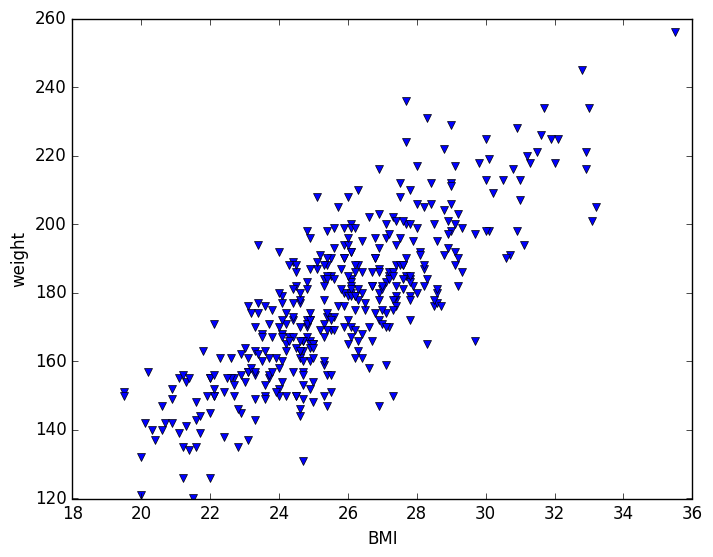

PyObject <matplotlib.text.Text object at 0x32d969b70>

In [67]:
#PROC PLOT DATA=mydata;
#PLOT bmi*weight='*';
#RUN;
#PyPlot.plt[:scatter](mydata[:bmi],mydata[:weight],marker=".")
plt.plot(mydata[:bmi],mydata[:weight], "v")
plt.xlabel("BMI")
plt.ylabel("weight")

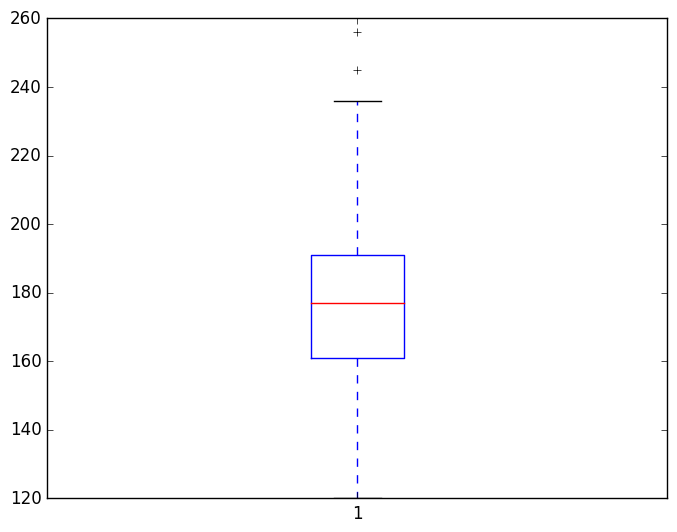

Dict{Any,Any} with 6 entries:
  "means"    => Any[]
  "whiskers" => Any[PyObject <matplotlib.lines.Line2D object at 0x3270fc8d0>,Py…
  "fliers"   => Any[PyObject <matplotlib.lines.Line2D object at 0x327106ac8>]
  "boxes"    => Any[PyObject <matplotlib.lines.Line2D object at 0x3270f4e80>]
  "caps"     => Any[PyObject <matplotlib.lines.Line2D object at 0x327102940>,Py…
  "medians"  => Any[PyObject <matplotlib.lines.Line2D object at 0x3271062b0>]

In [15]:
boxplot(mydata[:weight])

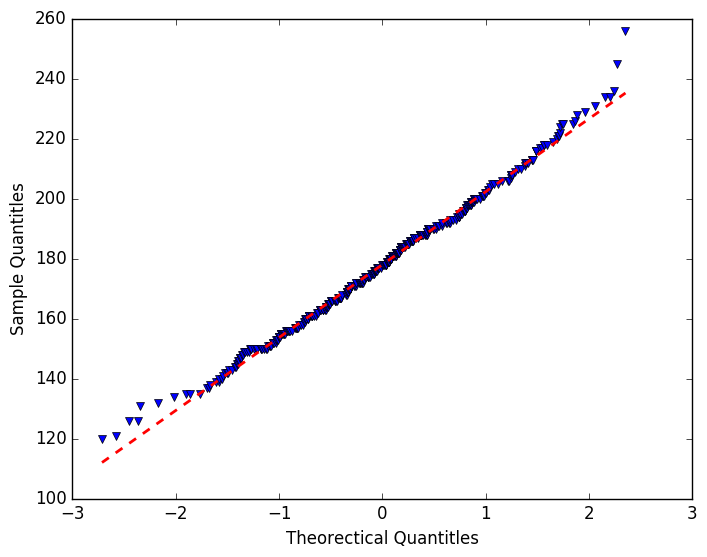

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x326e48cc0>

In [97]:
#Pkg.add("Stats")
using Stats

#define a qqnorm function to check whether vec(y) matches with normal distribution
function qqnorm(y::Vector,seed=1234)
    srand(seed)
    d = Normal()
    x = quantile(rand(d, length(y)),collect(0.002:0.99/length(y):0.99))
    ysort = sort(y)
    plt.plot(x, ysort,"v")
    plt.xlabel("Theorectical Quantitles")
    plt.ylabel("Sample Quantitles")
    slope = (quantile(y,0.75)-quantile(y,0.25))/(quantile(x,0.75)-quantile(x,0.25))
    intercept = quantile(y,0.5) - slope * quantile(x,0.5)
    b = intercept + x*slope
    plot(x, b, color="red", linewidth=2.0, linestyle="--")
end

qqnorm(Vector(mydata[:weight]))


## Fitting Parametric Curves and Modeling the Covariance

Longitudinal data requires modeling of both mean and covariance structure. Both models are done separately, but are interdependent.
* Covariance between measurements (assuming model for $\Sigma$): 
  - Unstructured
  - Modeled according to specific pattern e.g. autoregressive, banded
  - Random effects (later in the course)
* Mean response over time (assuming model for $\beta$):
  - Analysis of response profile
  - Parametric or semi-parametric curves
  
* Three broad approaches can be distinguished:
   - (1) “unstructured” or arbitrary pattern of covariance 
   - (2) covariance pattern models
   - (3) random effects covariance structure
   
Our objective is to analyze and interpret a two group repeated measures study by considering appropriate covariance structure and parametric curve models: quadratic, linear.
 * Part I: 
     - Data: weight loss study 
     - Choose a covariance structure
 * Part II: 
     - Model the mean using anaylsis of response profiles 
     - Model the mean using parametric curvesInterpret covariate parameter estimates in final model.
     
Data description:

Sixty overweight male subjects were randomly assigned to one of two weight loss programs. Both programs required subjects to follow a strict diet regimen and a daily exercise routine. In addition, subjects in program 1 received daily encouragement from a representative from the study, while subjects in program 2 received no such encouragement. Weight (in pounds) was measured at baseline (month 0) and at 3, 6, and 9 months thereafter.
Key aspects of design: We have a **balanced** study design with all subjects measured at the same four time points. Also, our data are **complete** (no missing data).

In [99]:
cd("/Users/jzhou/Documents/Bin/SASUniversityEdition/myfolders/CPH684/Lec12")

In [128]:
weightloss = readtable("weightloss.dat",separator = ' ',header=false)
#colnames(weightloss)<-c("id", "0","3","6","9", "program")
cnames = ["id", "d0","d3","d6","d9", "program"]
names!(weightloss, [Symbol(cnames[i]) for i in 1:6])
size(weightloss)
weightlossL = stack(weightloss,[:d0,:d3,:d6,:d9],[:id,:program]) 
weightlossL = sort(weightlossL,cols = [:id,:program])

,variable,value,id,program
1,d0,266.1,1,1
2,d3,254.8,1,1
3,d6,222.0,1,1
4,d9,175.5,1,1
5,d0,248.1,2,1
6,d3,198.4,2,1
7,d6,170.8,2,1
8,d9,149.1,2,1
9,d0,253.2,3,1
10,d3,207.1,3,1


Before fitting the variance component model, we pre-compute the eigen-decomposition of $2\Phi_{\text{GRM}}$, the rotated responses, and the constant part in log-likelihood, and store them as a `TwoVarCompVariateRotate` instance, which is re-used in various variane component estimation procedures.

In [24]:
# pre-compute eigen-decomposition (~50 secs on my laptop)
@time cg10kdata_rotated = TwoVarCompVariateRotate(cg10kdata)
fieldnames(cg10kdata_rotated)

 55.887248 seconds (1.06 M allocations: 1.043 GB, 0.28% gc time)


4-element Array{Symbol,1}:
 :Yrot    
 :Xrot    
 :eigval  
 :logdetV2

## Save intermediate results

We don't want to re-compute SnpArray and empirical kinship matrices again and again for heritibility analysis.

In [26]:
#using JLD
#@save "cg10k.jld"
#whos()

                 #210#wsession    280 bytes  JLD.JldWriteSession
                 #212#wsession    280 bytes  JLD.JldWriteSession
                          Base  34564 KB     Module
                       BinDeps    207 KB     Module
                         Blosc     37 KB     Module
                    ColorTypes    311 KB     Module
                        Colors    715 KB     Module
                        Compat    323 KB     Module
                         Conda     65 KB     Module
                          Core   6836 KB     Module
                    DataArrays    782 KB     Module
                    DataFrames   1822 KB     Module
                        Docile    414 KB     Module
                        FileIO    536 KB     Module
             FixedPointNumbers     32 KB     Module
               FixedSizeArrays    157 KB     Module
                          GZip    771 KB     Module
                          HDF5   3209 KB     Module
                        IJulia 2083312

To load workspace

In [52]:
#using SnpArrays, JLD, DataFrames, VarianceComponentModels, Plots
#pyplot()
#@load "cg10k.jld"
#whos()

## Heritability of single traits

We use Fisher scoring algorithm to fit variance component model for each single trait.

In [29]:
# heritability from single trait analysis
hST = zeros(13)
# standard errors of estimated heritability
hST_se = zeros(13)
# additive genetic effects
σ2a = zeros(13)
# enviromental effects
σ2e = zeros(13)

@time for trait in 1:13
    println(names(cg10k_trait)[trait + 2])
    # form data set for trait j
    traitj_data = TwoVarCompVariateRotate(cg10kdata_rotated.Yrot[:, trait], cg10kdata_rotated.Xrot, 
        cg10kdata_rotated.eigval, cg10kdata_rotated.logdetV2)
    # initialize model parameters
    traitj_model = VarianceComponentModel(traitj_data)
    # estimate variance components
    _, _, _, Σcov, _, _ = mle_fs!(traitj_model, traitj_data; solver=:Ipopt, verbose=false)
    σ2a[trait] = traitj_model.Σ[1][1]
    σ2e[trait] = traitj_model.Σ[2][1]
    @show σ2a[trait], σ2e[trait]
    h, hse = heritability(traitj_model.Σ, Σcov)
    hST[trait] = h[1]
    hST_se[trait] = hse[1]
end

Trait1
(σ2a[trait],σ2e[trait]) = (0.26104123217397407,0.7356884432614137)
Trait2
(σ2a[trait],σ2e[trait]) = (0.1887414738028781,0.8106899991616237)
Trait3
(σ2a[trait],σ2e[trait]) = (0.31857192765473236,0.6801458862875933)
Trait4
(σ2a[trait],σ2e[trait]) = (0.26556901333953215,0.7303588364945378)
Trait5
(σ2a[trait],σ2e[trait]) = (0.28123321193920503,0.7167989047155238)
Trait6
(σ2a[trait],σ2e[trait]) = (0.2829461149704314,0.716562953439665)
Trait7
(σ2a[trait],σ2e[trait]) = (0.2154385640394616,0.7816211121586024)
Trait8
(σ2a[trait],σ2e[trait]) = (0.19412648732666243,0.8055277649986169)
Trait9
(σ2a[trait],σ2e[trait]) = (0.24789561127297127,0.7504615853619782)
Trait10
(σ2a[trait],σ2e[trait]) = (0.10007455815563934,0.8998152773605567)
Trait11
(σ2a[trait],σ2e[trait]) = (0.1648677816930128,0.8338002257315535)
Trait12
(σ2a[trait],σ2e[trait]) = (0.08298660416199151,0.9158035668415299)
Trait13
(σ2a[trait],σ2e[trait]) = (0.05684248094793726,0.942365338132603)
  1.277847 seconds (27.43 M allocations:

In [30]:
# heritability and standard errors
[hST'; hST_se']

2x13 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

## Pairwise traits

Joint analysis of multiple traits is subject to intensive research recently. Following code snippet does joint analysis of all pairs of traits, a total of 78 bivariate variane component models.

In [48]:
# additive genetic effects (2x2 psd matrices) from bavariate trait analysis;
Σa = Array{Matrix{Float64}}(13, 13)
# environmental effects (2x2 psd matrices) from bavariate trait analysis;
Σe = Array{Matrix{Float64}}(13, 13)

@time for i in 1:13
    for j in (i+1):13
        println(names(cg10k_trait)[i + 2], names(cg10k_trait)[j + 2])
        # form data set for (trait1, trait2)
        traitij_data = TwoVarCompVariateRotate(cg10kdata_rotated.Yrot[:, [i;j]], cg10kdata_rotated.Xrot, 
            cg10kdata_rotated.eigval, cg10kdata_rotated.logdetV2)
        # initialize model parameters
        traitij_model = VarianceComponentModel(traitij_data)
        # estimate variance components
        mle_fs!(traitij_model, traitij_data; solver=:Ipopt, verbose=false)
        Σa[i, j] = traitij_model.Σ[1]
        Σe[i, j] = traitij_model.Σ[2]
        @show Σa[i, j], Σe[i, j]
    end
end

Trait1Trait2
(Σa[i,j],Σe[i,j]) = (
[0.26011943486601186 0.1762158250617613
 0.1762158250617613 0.18737615484007947],

[0.7365894055260143 0.5838920954615305
 0.5838920954615305 0.8120331390284958])
Trait1Trait3
(Σa[i,j],Σe[i,j]) = (
[0.2615639935561912 -0.013126818537540254
 -0.013126818537540254 0.3190566225472985],

[0.7351802111599617 -0.12112674834388097
 -0.12112674834388097 0.6796789899243143])
Trait1Trait4
(Σa[i,j],Σe[i,j]) = (
[0.2608796031577277 0.22261440559416618
 0.22261440559416618 0.2655808327606219],

[0.735845998165887 0.5994353345883121
 0.5994353345883121 0.7303474474501164])
Trait1Trait5
(Σa[i,j],Σe[i,j]) = (
[0.2607830377026644 -0.14701178378031446
 -0.14701178378031446 0.28187724546298826],

[0.7359373011287004 -0.25458389055860414
 -0.25458389055860414 0.7161761242033678])
Trait1Trait6
(Σa[i,j],Σe[i,j]) = (
[0.2607070355193131 -0.12935642592773852
 -0.12935642592773852 0.28318838486253467],

[0.7360128807197885 -0.231361283307625
 -0.231361283307625 0.716329432342

## 3-trait analysis

Researchers want to jointly analyze traits 5-7. Our strategy is to try both Fisher scoring and MM algorithm with different starting point, and choose the best local optimum. We first form the data set and run Fisher scoring, which yields a final objective value -1.4700991+04.

In [40]:
traitidx = 5:7
# form data set
trait57_data = TwoVarCompVariateRotate(cg10kdata_rotated.Yrot[:, traitidx], cg10kdata_rotated.Xrot, 
    cg10kdata_rotated.eigval, cg10kdata_rotated.logdetV2)
# initialize model parameters
trait57_model = VarianceComponentModel(trait57_data)
# estimate variance components
@time mle_fs!(trait57_model, trait57_data; solver=:Ipopt, verbose=true)
trait57_model

This is Ipopt version 3.12.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       78

Total number of variables............................:       12
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

VarianceComponentModels.VarianceComponentModel{Float64,2,Array{Float64,2},Array{Float64,2}}(0x3 Array{Float64,2},(
3x3 Array{Float64,2}:
 0.281163  0.280014  0.232384
 0.280014  0.284899  0.220285
 0.232384  0.220285  0.212687,

3x3 Array{Float64,2}:
 0.716875  0.66125   0.674025
 0.66125   0.714602  0.581433
 0.674025  0.581433  0.784324),0x0 Array{Float64,2},Char[],Float64[],-Inf,Inf)

We then run the MM algorithm, starting from the Fisher scoring answer. MM finds an improved solution with objective value 8.955397e+03.

In [42]:
# trait59_model contains the fitted model by Fisher scoring now
@time mle_mm!(trait57_model, trait57_data; verbose=true)
trait57_model


     MM Algorithm
  Iter      Objective  
--------  -------------
       0  -1.470099e+04
       1  -1.470099e+04

  0.083887 seconds (2.06 M allocations: 35.243 MB, 5.32% gc time)


VarianceComponentModels.VarianceComponentModel{Float64,2,Array{Float64,2},Array{Float64,2}}(0x3 Array{Float64,2},(
3x3 Array{Float64,2}:
 0.281163  0.280014  0.232384
 0.280014  0.284899  0.220285
 0.232384  0.220285  0.212687,

3x3 Array{Float64,2}:
 0.716875  0.66125   0.674025
 0.66125   0.714602  0.581433
 0.674025  0.581433  0.784324),0x0 Array{Float64,2},Char[],Float64[],-Inf,Inf)

Do another run of MM algorithm from default starting point. It leads to a slightly better local optimum -1.470104e+04, slighly worse than the Fisher scoring result. Follow up anlaysis should use the Fisher scoring result.

In [43]:
# default starting point
trait57_model = VarianceComponentModel(trait57_data)
@time _, _, _, Σcov, = mle_mm!(trait57_model, trait57_data; verbose=true)
trait57_model


     MM Algorithm
  Iter      Objective  
--------  -------------
       0  -3.024751e+04
       1  -2.040338e+04
       2  -1.656127e+04
       3  -1.528591e+04
       4  -1.491049e+04
       5  -1.480699e+04
       6  -1.477870e+04
       7  -1.477026e+04
       8  -1.476696e+04
       9  -1.476499e+04
      10  -1.476339e+04
      20  -1.475040e+04
      30  -1.474042e+04
      40  -1.473272e+04
      50  -1.472677e+04
      60  -1.472215e+04
      70  -1.471852e+04
      80  -1.471565e+04
      90  -1.471336e+04
     100  -1.471152e+04
     110  -1.471002e+04
     120  -1.470879e+04
     130  -1.470778e+04
     140  -1.470694e+04
     150  -1.470623e+04
     160  -1.470563e+04
     170  -1.470513e+04
     180  -1.470469e+04
     190  -1.470432e+04
     200  -1.470400e+04
     210  -1.470372e+04
     220  -1.470347e+04
     230  -1.470326e+04
     240  -1.470307e+04
     250  -1.470290e+04
     260  -1.470275e+04
     270  -1.470262e+04
     280  -1.470250e+04
     290  -1.470239e+

VarianceComponentModels.VarianceComponentModel{Float64,2,Array{Float64,2},Array{Float64,2}}(0x3 Array{Float64,2},(
3x3 Array{Float64,2}:
 0.281188  0.280032  0.232439
 0.280032  0.284979  0.220432
 0.232439  0.220432  0.212922,

3x3 Array{Float64,2}:
 0.71685   0.661232  0.67397 
 0.661232  0.71452   0.581287
 0.67397   0.581287  0.784092),0x0 Array{Float64,2},Char[],Float64[],-Inf,Inf)

Heritability from 3-variate estimate and their standard errors.

In [46]:
h, hse = heritability(trait57_model.Σ, Σcov)
[h'; hse']

2x3 Array{Float64,2}:
 0.281741   0.285122   0.21356  
 0.0778033  0.0773313  0.0841103

## Save analysis results

In [47]:
#using JLD
#@save "copd.jld"
#whos()